# Healthcare Claim Analysis Project

## 1. Introduction

This project focuses on leveraging data analytics to extract meaningful insights from a healthcare dataset. By analyzing the data, building a predictive model, and creating visualizations, the project demonstrates how data can support decision-making in healthcare.

The dataset used in this project contains key healthcare-related variables, which were cleaned and analyzed to uncover patterns and trends. A user-interactive model was built to take inputs and provide predictions, helping to simulate real-world scenarios in healthcare. The findings and results are visualized using Power BI dashboards, making the insights more accessible and impactful for stakeholders.

## 2. Data Loading and Initial Inspection

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/ratne/Downloads/healthinsurance_insurance.csv")

In [3]:
df.head(10)

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7
5,42.0,female,89,37.9,NoDisease,0,0,AtlanticCity,78,0,0,Dancer,6474.0
6,18.0,male,59,23.8,NoDisease,0,0,Portland,64,0,0,Singer,1705.6
7,21.0,male,52,26.8,NoDisease,0,0,Cambridge,74,1,0,Actor,1534.3
8,63.0,male,55,NaN,NoDisease,0,0,Hartford,70,1,0,Dancer,13390.6
9,40.0,female,69,29.6,NoDisease,0,0,Springfield,64,1,1,DataScientist,5910.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [5]:
df.select_dtypes(include = 'number').head(10)

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
0,60.0,64,24.3,1,0,72,0,0,13112.6
1,49.0,75,22.6,1,0,78,1,1,9567.0
2,32.0,64,17.8,2,1,88,1,1,32734.2
3,61.0,53,36.4,1,1,72,1,0,48517.6
4,19.0,50,20.6,0,0,82,1,0,1731.7
5,42.0,89,37.9,0,0,78,0,0,6474.0
6,18.0,59,23.8,0,0,64,0,0,1705.6
7,21.0,52,26.8,0,0,74,1,0,1534.3
8,63.0,55,NaN,0,0,70,1,0,13390.6
9,40.0,69,29.6,0,0,64,1,1,5910.9


In [6]:
df.describe()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,14604.000000,15000.000000,14044.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,39.547521,64.909600,30.266413,1.129733,0.198133,68.650133,0.777000,0.224133,13401.437620
std,14.015966,13.701935,6.122950,1.228469,0.398606,19.418515,0.416272,0.417024,12148.239619
min,18.000000,34.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.900000
25%,27.000000,54.000000,25.700000,0.000000,0.000000,64.000000,1.000000,0.000000,4846.900000
50%,40.000000,63.000000,29.400000,1.000000,0.000000,71.000000,1.000000,0.000000,9545.650000
75%,52.000000,76.000000,34.400000,2.000000,0.000000,80.000000,1.000000,0.000000,16519.125000
max,64.000000,95.000000,53.100000,5.000000,1.000000,122.000000,1.000000,1.000000,63770.400000


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,14604.0,39.547521,14.015966,18.0,27.0,40.00,52.000,64.0
weight,15000.0,64.909600,13.701935,34.0,54.0,63.00,76.000,95.0
bmi,14044.0,30.266413,6.122950,16.0,25.7,29.40,34.400,53.1
no_of_dependents,15000.0,1.129733,1.228469,0.0,0.0,1.00,2.000,5.0
smoker,15000.0,0.198133,0.398606,0.0,0.0,0.00,0.000,1.0
bloodpressure,15000.0,68.650133,19.418515,0.0,64.0,71.00,80.000,122.0
diabetes,15000.0,0.777000,0.416272,0.0,1.0,1.00,1.000,1.0
regular_ex,15000.0,0.224133,0.417024,0.0,0.0,0.00,0.000,1.0
claim,15000.0,13401.437620,12148.239619,1121.9,4846.9,9545.65,16519.125,63770.4


In [8]:
df.isnull().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

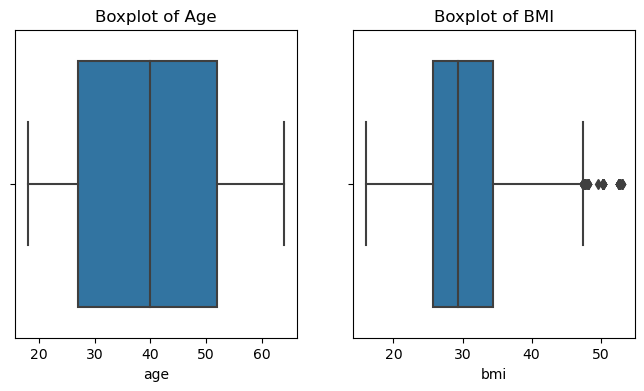

In [9]:
plt.figure(figsize = (8,4))


plt.subplot(1,2,1)
sns.boxplot(x = df["age"])
plt.title("Boxplot of Age")


plt.subplot(1,2,2)
sns.boxplot(x = df["bmi"])
plt.title("Boxplot of BMI")

plt.show()

### Handling Missing Values
Missing values were identified in the age (396 missing) and bmi (956 missing) columns. These were filled with the median rather than the mean due to the presence of outliers in both columns. The boxplots for age and bmi showed extreme values that could distort the mean. Since the median is less sensitive to outliers, it offers a more robust method for imputation, better reflecting the overall distribution of the data.

In [10]:
df.fillna(df['age'].median(), inplace = True)
df.fillna(df['bmi'].median(), inplace = True)

In [11]:

df.isnull().sum()

age                    0
sex                    0
weight                 0
bmi                    0
hereditary_diseases    0
no_of_dependents       0
smoker                 0
city                   0
bloodpressure          0
diabetes               0
regular_ex             0
job_title              0
claim                  0
dtype: int64

## Correlation Analysis

C:\Users\ratne\AppData\Local\Temp\ipykernel_16756\205097137.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


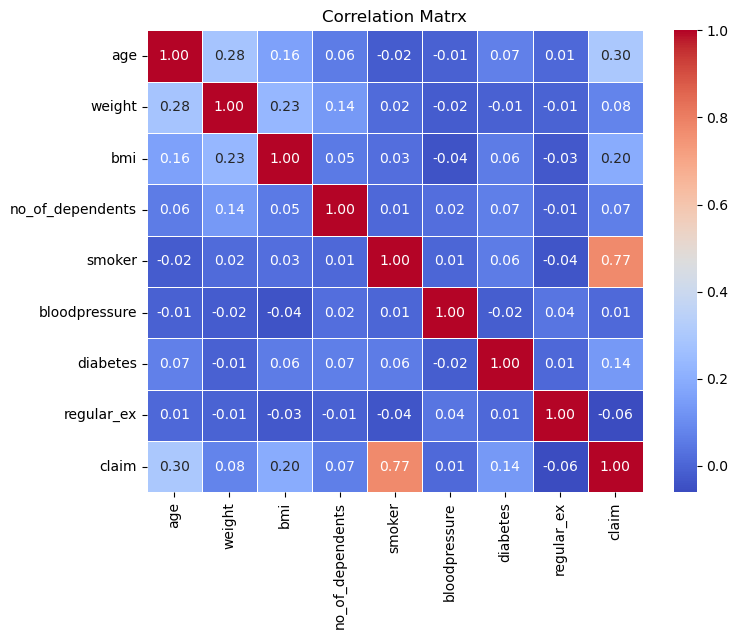

In [12]:

plt.figure(figsize = (8,6))
corr = df.corr()
sns.heatmap(corr, annot= True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title('Correlation Matrx')
plt.show()

### Insights

* The heatmap reveals a strong positive correlation between bmi, smoker, and claim. This suggests that higher BMI and smoking status are associated with higher healthcare claims, indicating that these are crucial factors in predicting insurance costs.
* age and claim also show a positive correlation, albeit weaker than BMI and smoking. This suggests that as individuals age, their healthcare needs increase, resulting in higher claims.

## 3. Claim Analysis Based on Key Factors

### Diabetes and Claims

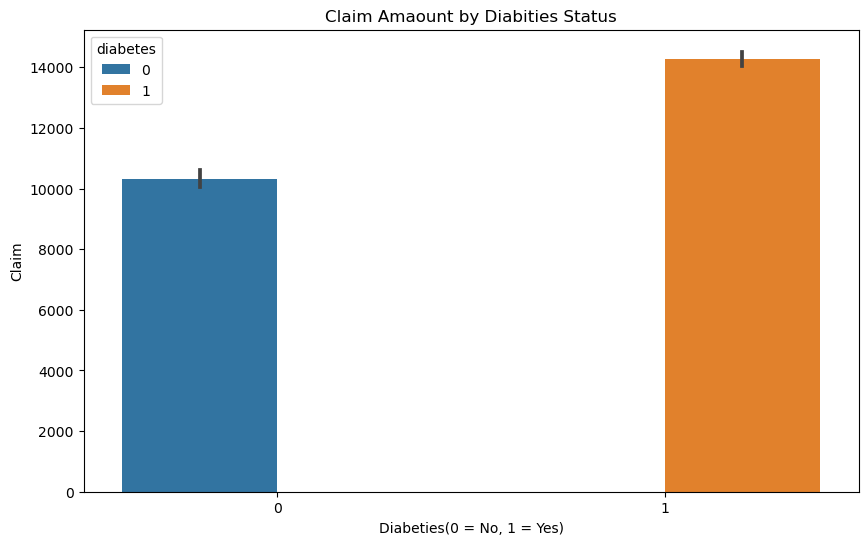

In [13]:


plt.figure(figsize = (10,6))
sns.barplot(x = 'diabetes', y = 'claim', hue = 'diabetes', data = df)
plt.title('Claim Amaount by Diabities Status')
plt.xlabel('Diabeties(0 = No, 1 = Yes)')
plt.ylabel('Claim')
plt.show()


#### Insights
* From the graph, diabetic patients consistently exhibit higher claim amounts than non-diabetic individuals, highlighting the     financial burden of managing diabetes.
* Claims for diabetic patients generally range between 2500 and 5000, with severe cases surpassing 10000, driven by        complications and advanced treatments.
* Introducing risk-adjusted premiums and optional riders for complications can help insurers manage costs while encouraging preventive care to reduce high-risk claims.

### Smoker and Claim

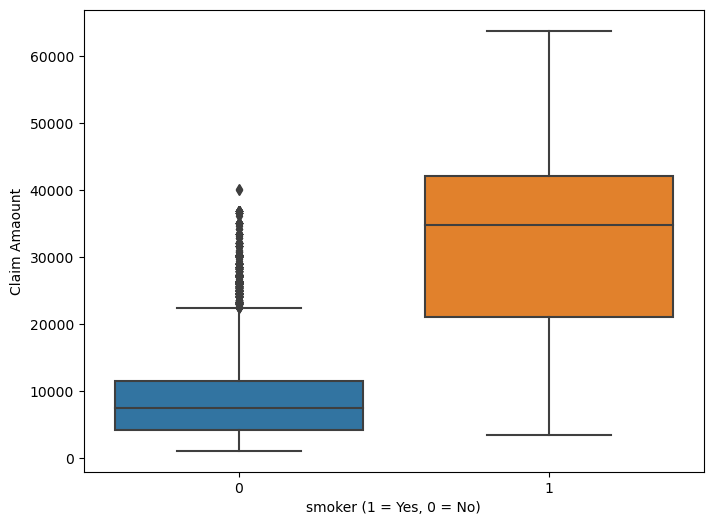

In [14]:
plt.figure(figsize = (8,6))
sns.boxplot(x = 'smoker', y = 'claim', data = df)
plt.xlabel('Claim Amount by Smoker')
plt.ylabel('Claim Amaount')
plt.xlabel('smoker (1 = Yes, 0 = No)')
plt.show()

#### Insights

* The graph shows smokers generally have higher claim amounts with a wider range of values compared to non-smokers.

* Outliers in the non-smoker group indicate a few individuals with exceptionally high claim amounts. This could be due to data anomalies, rare conditions, or isolated high-cost treatments, which deviate from the general trend seen for non-smokers.

* Non-smokers typically exhibit a more concentrated claim distribution at lower levels, whereas smokers show a broader distribution with consistently higher values.

### Age and Claims

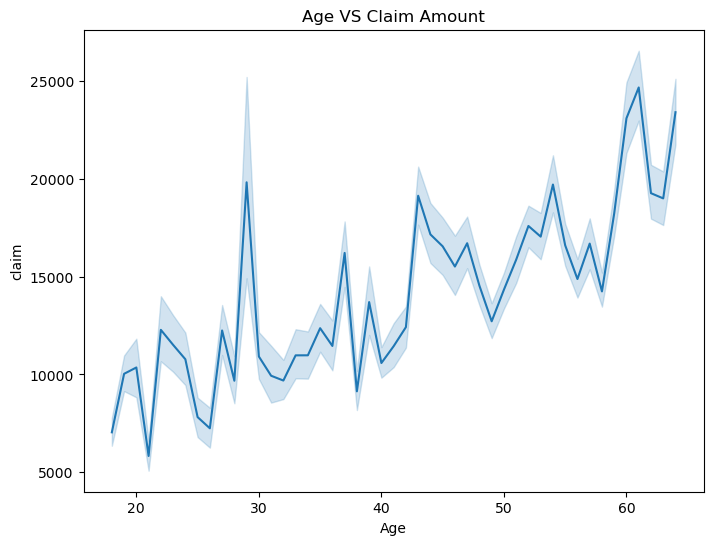

Correlation between Age and Claim Amount: 0.30


In [15]:
plt.figure(figsize = (8,6))
sns.lineplot(x = 'age', y = 'claim', data = df)
plt.title('Age VS Claim Amount')
plt.xlabel('Age')
plt.ylabel('claim')
plt.show()

correlation_age = df['age'].corr(df['claim'])
print(f"Correlation between Age and Claim Amount: {correlation_age:.2f}")

#### Insights
* The line graph shows a clear upward trend in claim amounts with increasing age, indicating that older individuals tend to incur higher healthcare costs compared to younger age groups.

* There is a noticeable steep rise in claim amounts after a certain age threshold (e.g., 50+), which suggests that healthcare needs significantly escalate as individuals age.

* Younger age groups exhibit relatively stable and lower claim amounts, reflecting fewer healthcare expenses compared to older populations, where variability and cost intensity increase.

### BMI and Claims

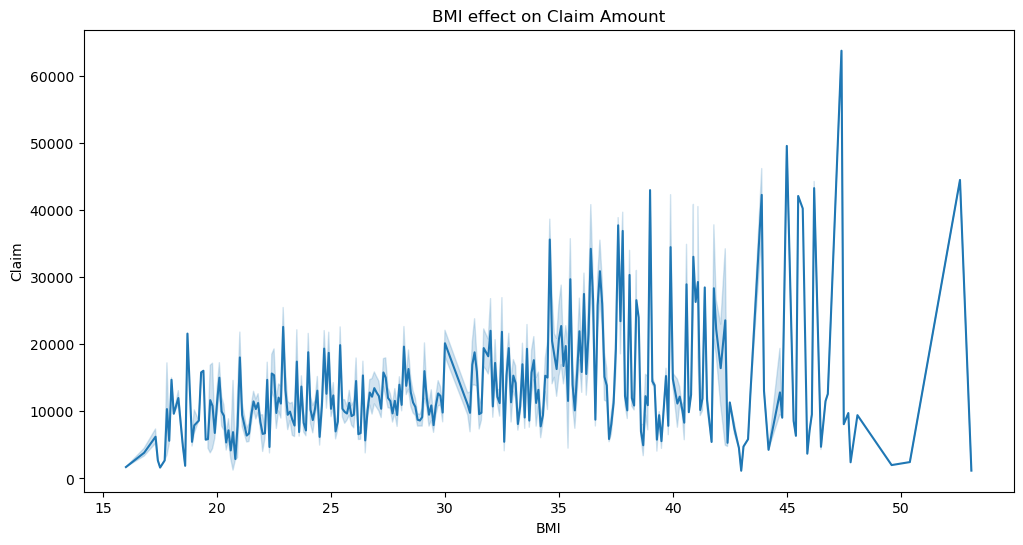

In [18]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'bmi', y = 'claim', data = df)
plt.xlabel('BMI')
plt.ylabel('Claim')
plt.title('BMI effect on Claim Amount')
plt.show()

In [19]:
bins = [15, 20, 25, 30, 35, 40, 45, 50]

df['bmi_range'] = pd.cut(df['bmi'], bins = bins)

bmi_range_counts = df['bmi_range'].value_counts().sort_index()

print('Number of People in each BMI range :')
print(bmi_range_counts)


Number of People in each BMI range :
(15, 20]     418
(20, 25]    2422
(25, 30]    4815
(30, 35]    3264
(35, 40]    3213
(40, 45]     642
(45, 50]     192
Name: bmi_range, dtype: int64


#### Insights
* The graph shows a positive trend between BMI and claim amounts, indicating that individuals with higher BMI tend to incur higher claims. This suggests a correlation between increased BMI and higher healthcare costs.

* The claim amounts begin to rise sharply for individuals with BMI above a certain threshold (e.g., 30+), reflecting potentially higher medical needs associated with elevated BMI levels.

* Individuals with lower BMI exhibit relatively stable and lower claim amounts, while higher BMI categories show greater variability, suggesting a wider range of medical expenses.



###### Reason for Lower Claims in Higher BMI Ranges:
The lower average claims in higher BMI categories (40-50) can be attributed to the smaller population sizes in these ranges: 642 in 40-45 and 192 in 45-50. Since the graph displays average claims, the smaller sample size makes the averages more sensitive to outliers (e.g., individuals with lower claims). Additionally, factors like reduced healthcare access or younger individuals without chronic conditions may also explain the trend.

### Claim Amount by BMI Status

In [20]:
def bmi_category_function(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal Weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'
df['bmi_category'] = df['bmi'].apply(bmi_category_function)

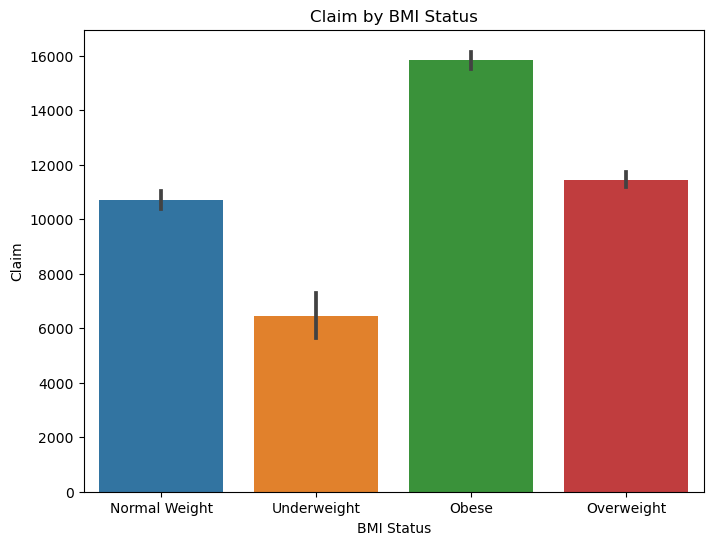

In [21]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'bmi_category', y = 'claim', data = df)
plt.title('Claim by BMI Status')
plt.xlabel('BMI Status')
plt.ylabel('Claim')
plt.show()

#### Insights
* Individuals with an "Obese" BMI status have significantly higher and more variable claim amounts, reflecting greater healthcare needs and cost variability.
* The "Overweight" group shows moderately higher claims than "Normal," suggesting that even slight increases in BMI contribute to higher costs.
* The "Normal" BMI status correlates with the lowest claim amounts, while outliers likely reflect unrelated high-cost treatments.

### Comparison of Average Claim Amount by BMI Category and Smoker Status

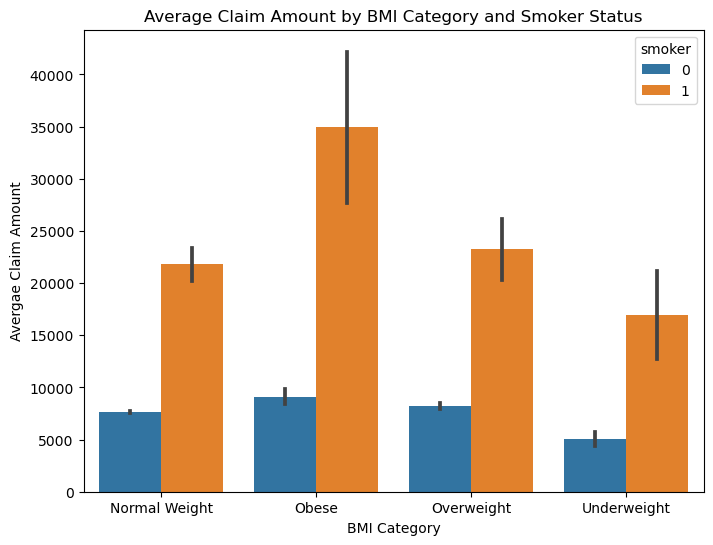

In [22]:
combined_analysis = df.groupby(['smoker', 'diabetes', 'bmi_category'])['claim'].mean().reset_index()

plt.figure(figsize = (8,6))
sns.barplot(x = 'bmi_category', y = 'claim', hue = 'smoker', data = combined_analysis)
plt.title('Average Claim Amount by BMI Category and Smoker Status')
plt.xlabel('BMI Category')
plt.ylabel('Avergae Claim Amount')
plt.show()


### Insights

* The graph shows that smokers consistently incur higher claim amounts than non-smokers across all BMI categories. This suggests that smoking is a significant driver of healthcare costs, regardless of BMI, and amplifies the financial impact even within healthier BMI ranges.

* In the "Obese" BMI category, smokers have the highest average claim amounts among all groups. This indicates that the combination of high BMI and smoking leads to compounded health risks, resulting in significantly higher claims.

* Non-smokers in the "Normal Weight" category exhibit the lowest claim amounts, reflecting a correlation between healthier lifestyles and reduced healthcare costs. However, the "Underweight" category shows more variability in claim amounts for both smokers and non-smokers, which could indicate unique health conditions or outliers in this group.



### Average Claim Amount by BMI Category and Diabetes Status

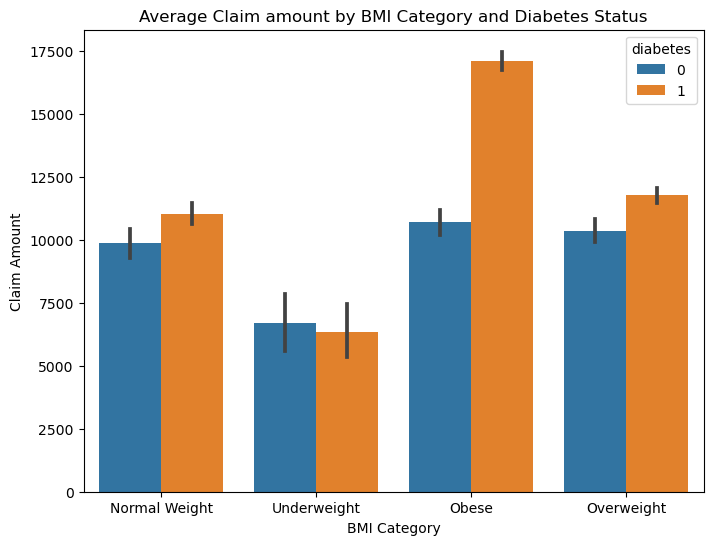

In [23]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'bmi_category', y = 'claim', hue = 'diabetes', data = df)
plt.title('Average Claim amount by BMI Category and Diabetes Status')
plt.xlabel('BMI Category')
plt.ylabel('Claim Amount')
plt.show()

### Insight
* Individuals with diabetes generally have higher average claim amounts compared to those without diabetes across all BMI categories. This trend is particularly pronounced in the "Obese" category, where claims are significantly elevated for diabetic individuals, highlighting the increased healthcare costs associated with managing diabetes in obese patients.

* Non-diabetic individuals maintain relatively consistent claim amounts across BMI categories, whereas diabetic individuals show a substantial rise, especially in the "Obese" category. This emphasizes the compounded financial burden of obesity and diabetes on healthcare claims.

### Bloodpressure and Claims

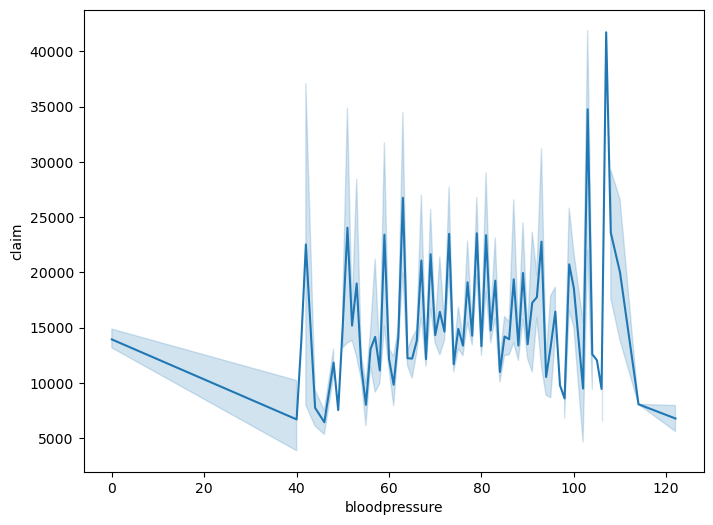

In [24]:
plt.figure(figsize = (8,6))
sns.lineplot(x = 'bloodpressure', y = 'claim', data = df)
plt.show()

In [35]:
bins = [10,50,60,70,80,90,100,120,130,140,180]
df['bp_range'] = pd.cut(df['bloodpressure'], bins = bins)

bp_range_count = df['bp_range'].value_counts().sort_index()
print(bp_range_count) 

(10, 50]       454
(50, 60]      1795
(60, 70]      4484
(70, 80]      4539
(80, 90]      2310
(90, 100]      485
(100, 120]     149
(120, 130]      28
(130, 140]       0
(140, 180]       0
Name: bp_range, dtype: int64


### Insights 
* The relationship between blood pressure levels and claim amounts is highly variable, with no consistent trend observed. This suggests that factors beyond blood pressure, such as other health or demographic variables, may significantly influence claim amounts.

* The majority of data points are concentrated in the 50–100 blood pressure range, with very few entries in higher ranges. This imbalance likely impacts the observed variability, as limited data in higher ranges may lead to less reliable insights.

In [26]:
def bp_category_function(bloodpressure):
    if pd.isna(bloodpressure):
        return 'Unknown'
    elif bloodpressure < 120:
        return 'Normal'
    elif 120 <= bloodpressure < 130:
        return 'Elavated'
    elif 130 <= bloodpressure < 140:
        return 'Hypertension Stage 1'
    elif 140 <= bloodpressure < 180:
        return 'Hypertension Stage 2'                 
    else:
        return 'Hypertensive Crisis'
 
df['bp_category'] = df['bloodpressure'].apply(bp_category_function)

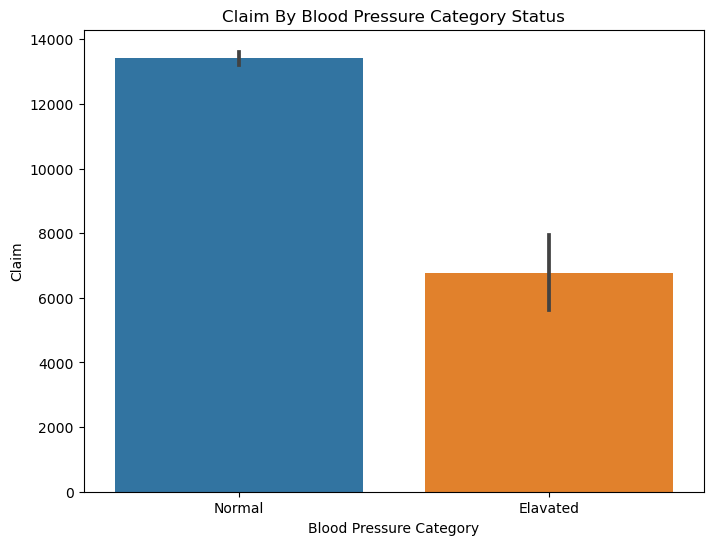

In [27]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'bp_category', y = 'claim', data = df)
plt.title('Claim By Blood Pressure Category Status')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Claim')
plt.show()

### Insight
* Patients with normal blood pressure have higher average claim amounts compared to those with elevated blood pressure, potentially indicating greater utilization of healthcare services.

* The trend may be influenced by the larger number of patients in the "normal" category, which could skew the average claim amounts across categories.

### Age and Claim

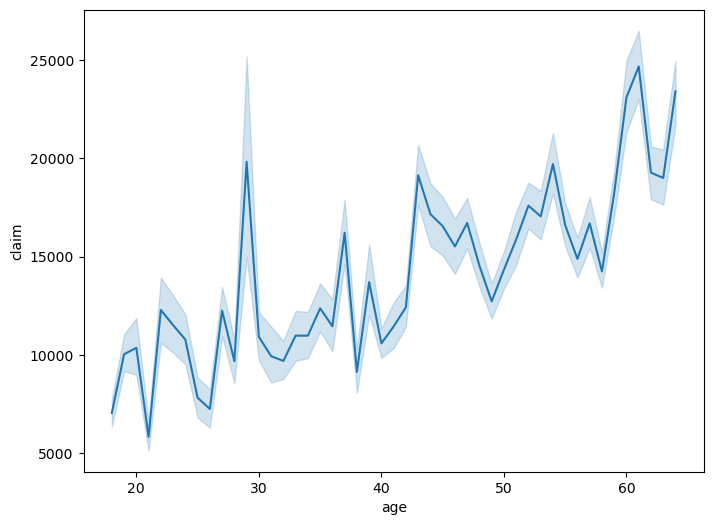

In [28]:
plt.figure(figsize = (8,6))
sns.lineplot(x = 'age', y = 'claim', data = df)
plt.show()

In [29]:
def age_category_function(age):
    if pd.isna(age):
        return 'Unknown'
    elif age <= 18:
        return 'Child'
    elif 19 <= age <= 35:
        return 'Young Adults'
    elif 35<= age <=55:
        return 'Middile Aged Adults'
    else:
        return 'Seniors'
    
df['age_category'] = df['age'].apply(age_category_function) 

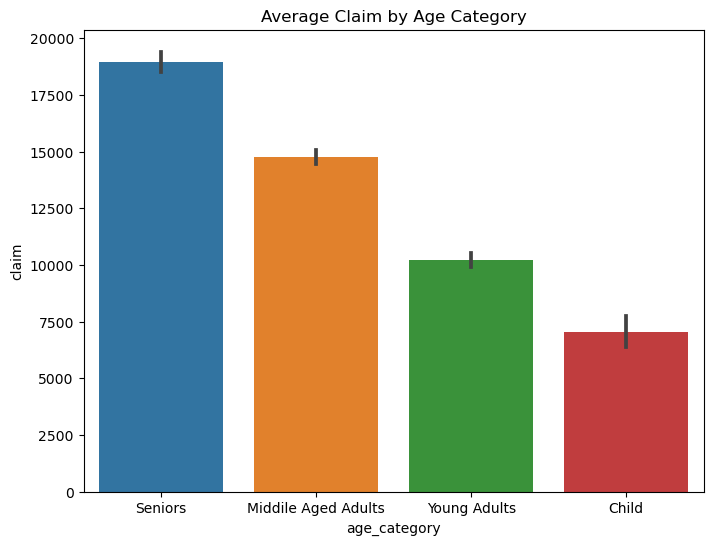

In [30]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'age_category', y = 'claim', data = df)
plt.title('Average Claim by Age Category')
plt.show()


#### Insight
* The analysis reveals that the average claim amount is the highest among the "Seniors" age category, followed by "Middle-Aged Adults." This suggests that older individuals tend to incur higher claims, likely due to increased healthcare needs associated with aging, such as chronic conditions or greater reliance on medical services.

* The "Young Adults" and "Children" categories have lower average claims, with children having the least. This may reflect better general health and fewer medical interventions required in younger populations.

### Claim Analysis by Gender

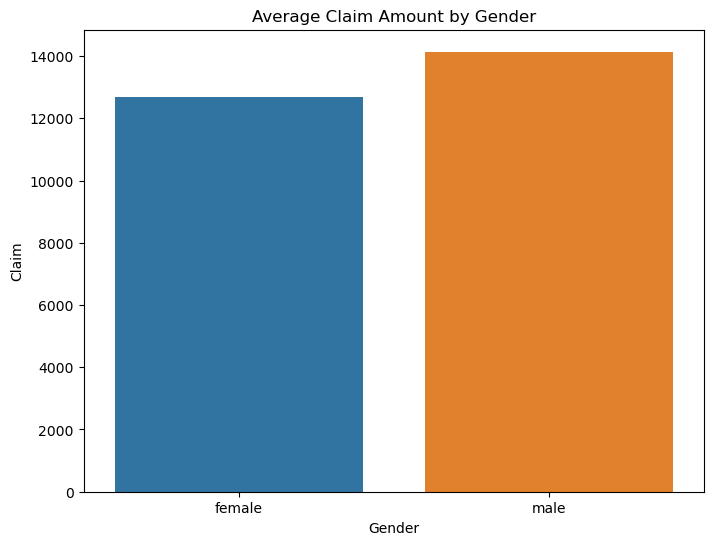

In [31]:
sex_claim_analysis = df.groupby('sex')['claim'].mean().reset_index()

plt.figure(figsize = (8,6))
sns.barplot(x = 'sex', y = 'claim', data = sex_claim_analysis)
plt.title('Average Claim Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Claim')
plt.show()


#### Insight
* Males show a slightly higher average claim amount than females, indicating possible gender-based differences in healthcare utilization or risk profiles.

* The variation, while minor, may stem from gender-specific health needs or conditions.

### Average Claim Amount by Gender and Smoking Status

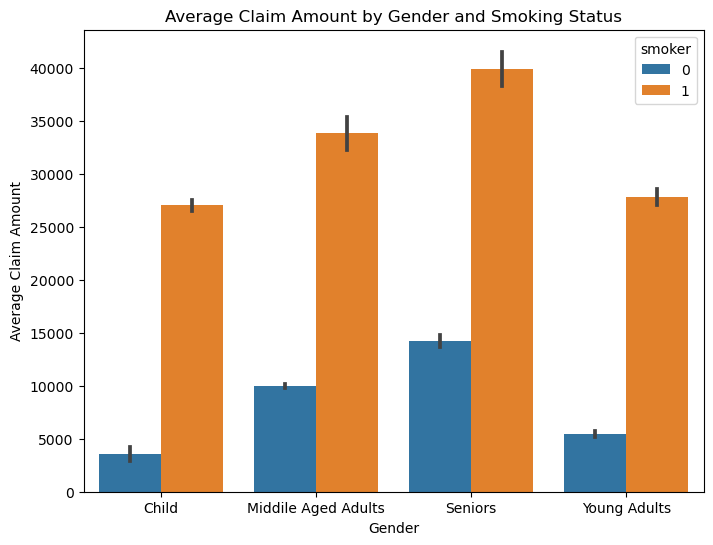

In [32]:
# Group the data by 'sex' and 'smoker', then calculate the mean claim
sex_smoker_claim_analysis = df.groupby(['sex', 'smoker', 'age_category'])['claim'].mean().reset_index()

# Plotting the bar plot
plt.figure(figsize = (8,6))
sns.barplot(x = 'age_category', y = 'claim', hue = 'smoker', data = sex_smoker_claim_analysis)
plt.title('Average Claim Amount by Gender and Smoking Status')
plt.xlabel('Gender')
plt.ylabel('Average Claim Amount')
plt.show()


#### Insights
* Smokers consistently exhibit significantly higher claim amounts across all age categories, indicating the substantial impact of smoking on healthcare costs.

* Senior smokers display the highest average claim amount, reflecting the compounding health risks associated with age and smoking habits. Non-smokers maintain lower claims overall, reinforcing the health and financial benefits of avoiding smoking.

### Random Forest Regression to Predict Insurance Claims

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x = df[['age', 'bmi','weight', 'smoker', 'bloodpressure', 'diabetes']]
y = df['claim']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = RandomForestRegressor(n_estimators = 100, random_state = 42 )

model.fit(x_train, y_train)

def preddict_claim (age, bmi, weight, smoker, bloodpressure, diabetes):
    input_data = pd.DataFrame({
        'age' :[age],
        'bmi' :[bmi],
        'weight':[weight],
        'smoker':[smoker],
        'bloodpressure':[bloodpressure],
        'diabetes':[diabetes]
        
    })
    
    prediction = model.predict(input_data)
    
    return prediction[0]

As the data is non-linear, Random Forest Regression is used to create a model that can predict the claim amount of a person based on different factors such as age, BMI, weight, smoking status, blood pressure, and diabetes.

### User Input-Based Claim Report

Enter Age: 25
Enter Weight (kg): 50
Enter BMI: 30
Enter Blood Pressure: 88
Enter 1 if Diabetes is present, 0 otherwise: 1
Enter 1 if Smoker, 0 otherwise: 1


Report of the Person:
User Age: 25.0
BMI: 30.0
Weight: 50.0
Smoker Status: Yes
Blood Pressure: 88.0
Diabetes Status: Yes
Age Category: Young Adults
BMI Category: Obese
Blood Pressure Category: Normal
Predicted Claim: 19074.31
Average Claim in Age Category: 10199.99
Premium Suggestion: The predicted claim is higher than the average claim for this age category. Charging a premium may be considered.


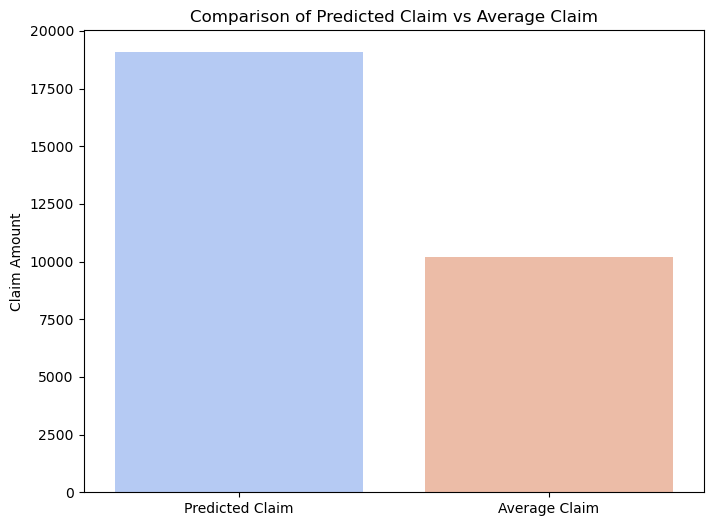

In [34]:


def predict_claim_with_report(age, bmi, weight, smoker, bloodpressure, diabetes):
    
    input_data = pd.DataFrame({
        'age': [age],
        'bmi': [bmi],
        'weight': [weight],
        'smoker': [smoker],
        'bloodpressure': [bloodpressure],
        'diabetes': [diabetes]
    })
    

    predicted_claim = model.predict(input_data)[0]
    
    
    age_category = age_category_function(age) 
    bmi_category = bmi_category_function(bmi) 
    bp_category = bp_category_function(bloodpressure)
    
    
    average_claim_age = df[df['age_category'] == age_category]['claim'].mean()
    
    print("\n\n\033[1mReport of the Person:\033[0m")
    print("=" * 40)
    
    report = { 
        "User Age": age,
        "BMI": bmi,
        "Weight": weight,
        "Smoker Status": "Yes" if smoker == 1 else "No",
        "Blood Pressure": bloodpressure,
        "Diabetes Status": "Yes" if diabetes == 1 else "No",
        "Age Category": age_category,
        "BMI Category": bmi_category,
        "Blood Pressure Category": bp_category,
        "Predicted Claim": round(predicted_claim, 2),
        "Average Claim in Age Category": round(average_claim_age, 2),
        "Premium Suggestion": "The predicted claim is higher than the average claim for this age category. Charging a premium may be considered." if predicted_claim > average_claim_age else "The predicted claim is within the average range for this age category. Charging a premium may not be necessary."
    }
    

    for key, value in report.items():
        print(f"{key}: {value}")
    

    plt.figure(figsize=(8, 6))
    sns.barplot(x=['Predicted Claim', 'Average Claim'], y=[predicted_claim, average_claim_age], palette='coolwarm')
    plt.title('Comparison of Predicted Claim vs Average Claim')
    plt.ylabel('Claim Amount')
    plt.show()


age = float(input("Enter Age: "))
weight = float(input("Enter Weight (kg): "))
bmi = float(input("Enter BMI: "))
bloodpressure = float(input("Enter Blood Pressure: "))
diabetes = int(input("Enter 1 if Diabetes is present, 0 otherwise: "))
smoker = int(input("Enter 1 if Smoker, 0 otherwise: "))


predict_claim_with_report(age, bmi, weight, smoker, bloodpressure, diabetes)


This model generates a personalized claim prediction based on user inputs such as age, BMI, weight, smoking status, blood pressure, and diabetes. It provides a detailed report comparing the predicted claim with the average claim for similar categories. A visual bar graph highlights the difference between the predicted and average claim amounts. Additionally, the model offers a recommendation on whether a premium charge should be applied to the individual's insurance based on their predicted claim relative to the average.

## Conclusion

This project successfully analyzed healthcare claim data to uncover key factors influencing claim amounts, such as BMI, smoking status, and diabetes. A Random Forest Regression model was developed to predict claim amounts based on user inputs, enabling personalized claim estimation. The model’s ability to provide detailed user-specific reports ensures practical applications for insurance decision-making. Through this analysis, valuable insights were derived to better understand healthcare costs and their drivers, offering data-driven solutions for managing insurance claims effectively.

## Future Scope

The project can be enhanced by incorporating additional features such as geographical location, medical history, and healthcare service utilization to improve predictive capabilities. More advanced models, like Gradient Boosting or Neural Networks, can be explored to further increase accuracy. Developing an interactive user interface would make the model accessible to non-technical users, allowing for real-world integration in insurance workflows. Future analysis could focus on time-series trends in claim amounts to enable better cost forecasting and resource allocation. These enhancements will extend the applicability of the project and contribute to more effective healthcare cost management.

In [45]:
from IPython.display import FileLink

# Save the DataFrame to a CSV file
df.to_csv("Healthcare_Data.csv", index=False)

# Create a download link
FileLink("Healthcare_Data.csv")


C:\Users\ratne\Healthcare_Data.csv

In [48]:
from IPython.display import FileLink


df.to_excel("Healthcare_Data.xlsx", index = False)
FileLink("Healthcare_Data.xlsx")

C:\Users\ratne\Healthcare_Data.xlsx